#  DEEPLEARNING PROJECT





Team: Alberto Padilla, Lien Chin, Berta Pfaff, Francesc Vilaró.


The dataset is organized into 2 folders (train, test) and contains subfolders for each image category (Pneumonia/Normal). There are X-Ray images (JPEG) and 2 categories (Pneumonia/Normal). Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care. For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.

# Libraries

In [1]:
# Library System
import os

# Library Images Treatment
from PIL import Image
import cv2
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# Library Neural Network
import tensorflow as tf
from tensorflow import keras
from keras.layers import Flatten, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split

# Library Graphics
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Library Counter-Process
from tqdm import tqdm

# Library Application Form
import tkinter as tk

In [2]:
os.getcwd()

'C:\\Users\\User\\Máster Data Science\\Deep Learning\\Final_Project'

# Auxiliary Functions

**PARAMETERS FORM**

In [3]:
def parameters_form():
    
    # Function to be executed when the "Save" button is pressed.
    def save_variables():

        global IMG_SIZE,num_imagenesXimagen,num_imagenes_totales,test_size,val_size,BATCH_SIZE,EPOCHS

        # Get the values entered by the user in the input fields
        IMG_SIZE = int(img_size_entry.get()or 128) 
        num_imagenesXimagen = int(num_imagenes_entry.get()or 0) 
        num_imagenes_totales=int(num_imagenes_tot_entry.get()or 0) 
        test_size=float(test_size_entry.get() or 0.11)
        val_size=float(val_size_entry.get()or 0.1) 
        BATCH_SIZE=int(BATCH_SIZE_entry.get()or 32) 
        EPOCHS=int(EPOCHS_entry.get()or 1) 

        # Cerrar la ventana
        root.destroy()
    
    # Create the main window
    root = tk.Tk()
    root.title("Parameters Form")

    # Create the necessary widgets (labels, input fields and buttons)
    img_size_label = tk.Label(root, text="Size Image to Transform \n def(128x128): ")
    img_size_entry = tk.Entry(root)
    img_size_label.pack()
    img_size_entry.pack()

    num_imagenes_label = tk.Label(root, text="Images created for EACH image \n def(0):")
    num_imagenes_entry = tk.Entry(root)
    num_imagenes_label.pack()
    num_imagenes_entry.pack()
    
    num_imagenes_tot_label = tk.Label(root, text="Total Images Created def(0):")
    num_imagenes_tot_entry = tk.Entry(root)
    num_imagenes_tot_label.pack()
    num_imagenes_tot_entry.pack()
    
    test_size_label = tk.Label(root, text="Size TEST (0-1) set def(0.11):")
    test_size_entry = tk.Entry(root)
    test_size_label.pack()
    test_size_entry.pack()
    
    val_size_label = tk.Label(root, text="Size VALIDATION (0-1) set def(0.1):")
    val_size_entry = tk.Entry(root)
    val_size_label.pack()
    val_size_entry.pack()
    
    BATCH_SIZE_label = tk.Label(root, text="Size BATCH def(32):")
    BATCH_SIZE_entry = tk.Entry(root)
    BATCH_SIZE_label.pack()
    BATCH_SIZE_entry.pack()
    
    EPOCHS_label = tk.Label(root, text="Size EPOCHS def(1):")
    EPOCHS_entry = tk.Entry(root)
    EPOCHS_label.pack()
    EPOCHS_entry.pack()

    guardar_button = tk.Button(root, text="Guardar", command=save_variables)
    guardar_button.pack(side='left')
    
    button_close = tk.Button(root, text="Close", command=root.destroy)
    button_close.pack(side='right')

    # Start the main application loop
    root.mainloop()

**DIRECTORY SCANNING AND FILE CONTENT SCANNING FUNCTION**

In [4]:
def image_exploration(_path):
    '''
    Create a list of tuples with class, path and size for each image
    '''    
    tuples_list=[]
    num_archivos={}
    
    # We go through the directory
    for raiz, dirs, archivos in os.walk(_path):
        num_archivos[raiz]=len(archivos)

        
        # We get the class (NORMAL or PNEUMONIA), the image size
        # and the full path of the image
        for archivo in archivos:
            image_path=os.path.normpath((os.path.join(raiz, archivo)))
            try:
                image_class=image_path.split('\\')[2]
            except:
                image_class='NORMAL'
                
            with Image.open(image_path) as img:
                image_size = img.size
            
        # We create tuplay and add to the list
            tuple_image=(image_class, image_path,image_size) # (TEST-TRAIN,CLASS,PATH,SIZE (WIDTH-HEIGHT))
            tuples_list.append(tuple_image)
    
    # Graph Files
    plt.bar(list(num_archivos.keys()), num_archivos.values(), color='Blue')
    for i, value in enumerate(num_archivos.values()):
        plt.text(i, value+(value*0.06), str(value), ha='center')
        
    plt.xticks(rotation=90)
    return tuples_list

**IMAGE ENLARGEMENT FUNCTION**

In [5]:
def images_creator(_listTuplesImages):
    '''
    Function which generate _totalImages, creating _numImagesCreate by each images in _listTuplesImages
    '''
    i=1
    
   # Create the "image" folder if it does not exist
    if not os.path.exists('image'):
        os.makedirs('image')
        
    for tuple_images in _listTuplesImages:
        if tuple_images[0]=='NORMAL':
                image_generator(tuple_images[1])
                i+=num_imagenesXimagen           
                if i > (num_imagenes_totales):
                    break 

    return print(f'Proceso completado')
                

<font size=1>**GENERATING SUB-FUNCTION**</font>

In [6]:
def image_generator(_pathImage):
    
    # Creates a data generator object that transforms images
    datagen = ImageDataGenerator(
    rotation_range=50,
    fill_mode='nearest')
    
    # Open images
    image_array=cv2.imread(_pathImage, cv2.IMREAD_GRAYSCALE)
    image_array=np.expand_dims(image_array,axis=2)
    i = 1
    name_image=_pathImage.split('\\')[3]
                                   
    for batch in datagen.flow(np.array([image_array]), save_format='jpeg'):
        for item in tqdm(batch,total=(num_imagenesXimagen)):
            cv2.imwrite(f'image/{i}{name_image}', item)
        i += 1
        if i > (num_imagenesXimagen): 
            break

**SIZE ADJUSTMENT FUNCTION**

In [7]:
def format_example(_pathImage):
    """
    returns an image that is reshaped to IMG_SIZE
    
    """
    image_array=cv2.imread(_pathImage, cv2.IMREAD_GRAYSCALE)
    image_array=np.array(image_array)
    image_array=np.expand_dims(image_array,axis=2) 
    image_array = image_array.reshape((1,) + image_array.shape) 
    image_array = (image_array/255)
    image_array = tf.image.resize(image_array, (IMG_SIZE, IMG_SIZE))
    
    return image_array

**FUNCTION TO CREATE DATASETS**

In [8]:
def dataset_creator(_listTuples):
    ds_image_NORMAL=[]
    ds_image_PNEUMO=[]

    for i, tuple_image in tqdm(enumerate(_listTuples), total=len(_listTuples)):
        
        image_array=format_example(tuple_image[1]) # Change to array
        
        if tuple_image[0]=='NORMAL':
            in_tuple=('NORMAL',image_array)
            ds_image_NORMAL.append(in_tuple)
        else:
            in_tuple=('PNEUMONIA',image_array)
            ds_image_PNEUMO.append(in_tuple)

    print("Proceso completo.")
    return ds_image_NORMAL,ds_image_PNEUMO

**FUNCTION TO CREATE CONJUNCTIONS X, y**

In [9]:
def dataset_loader(_listTuples):
    '''
    
    '''
    X = [x[1] for x in ds_total]

    for i in range(len(X)):
        X[i] = tf.reshape(X[i], (IMG_SIZE, IMG_SIZE, 1))

    y = [x[0] for x in ds_total]
    # Conversion dictionary
    label_dict = {"NORMAL": 0, "PNEUMONIA": 1}

    # Apply the conversion to each item in the list
    y = [label_dict[label] for label in y]

    X = np.asarray(X)
    y= np.asarray(y)
    return X,y

**FUNCTION TO CONVERT A GREYSCALE IMAGE TO RGB**

In [10]:
def convert_RGB(_X):
    '''
    transfgorma una imagen de escala de grises a escala RGB, triplicando el numero de canales y el pixel 
    '''
    # Creates a new array Y with the same shape as X but with three channels
    X_rgb = np.zeros((_X.shape[0], _X.shape[1], _X.shape[2], 3))

    # Duplicates the values of each pixel of X in the new channels
    X_rgb[..., 0] = _X[..., 0]
    X_rgb[..., 1] = _X[..., 0]
    X_rgb[..., 2] = _X[..., 0]

    return X_rgb


#  Scanning, Pre-processing and Loading Data

In [11]:
#Introduce Parameter for the Model.
parameters_form()

## Exploration 

('NORMAL', 'datasets\\test\\NORMAL\\IM-0009-0001.jpeg', (1852, 1443))

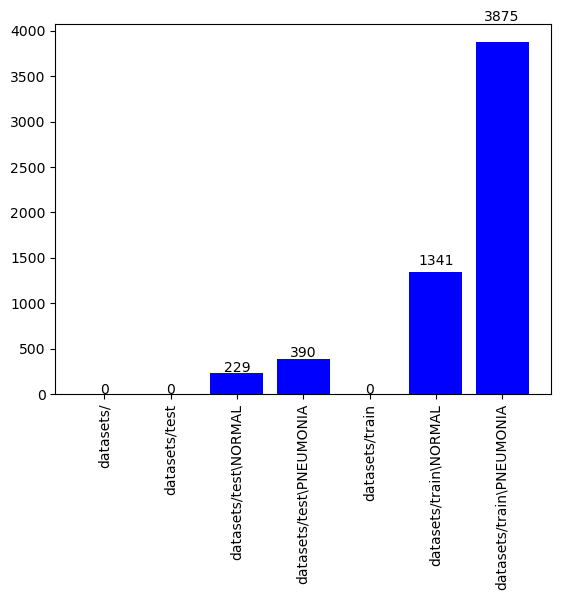

In [12]:
# Rute
dir_images= "datasets/"

# Creating a list of tuples with (CLASS, PATH, (WIDTH-HEIGHT))
images_list=image_exploration(dir_images)
images_list[0]

## Image Augmentation

In [13]:
# List of Tuples
images_creator(images_list)

 33%|████████████████████████████                                                        | 1/3 [00:00<00:00, 17.18it/s]

Proceso completado


## List of Created Images

('NORMAL', 'image\\0IM-0009-0001.jpeg.jpg', (1852, 1443))

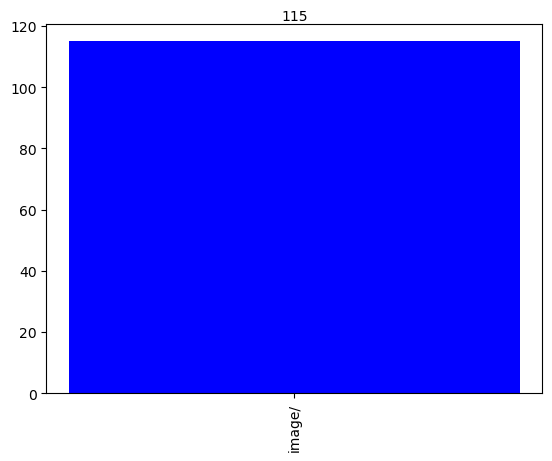

In [14]:
# Rute
dir_images_news= "image/"

# Creating a list of tuples with (CLASS, PATH, (WIDTH-HEIGHT))
new_images_list=image_exploration(dir_images_news)
new_images_list[0] 

## Dataset creation (NORMAL - PNEUMONIA)

In [15]:
ds_list=images_list+new_images_list
ds_NORMAL, ds_PNEUMO=dataset_creator(ds_list)
ds_total=ds_NORMAL+ds_PNEUMO

100%|██████████████████████████████████████████████████████████████████████████████| 5950/5950 [01:41<00:00, 58.67it/s]

Proceso completo.


## Load Datasets

In [16]:
X,y=dataset_loader(ds_total)

# DEFINITION OF THE MODEL

## Own Model

<font size=3>**SUBSET OF TRAIN, TEST & VALIDATION**</font>

In [17]:
# Definition 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=val_size, random_state= 42)
X_train, X_val, y_train, y_val =train_test_split(X_train,y_train, test_size=test_size,random_state= 42)
print(f'X (train/test/val):{len(X_train)},{len(X_test)},{len(X_val)} -- y (train/test/val):{len(y_train)},{len(y_test)},{len(y_val)}')

X (train/test/val):4765,595,590 -- y (train/test/val):4765,595,590


<font size=3>**MODEL**</font>

In [18]:
model_PROP= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Flatten(input_shape= (IMG_SIZE, IMG_SIZE, 1)),
    tf.keras.layers.Dense(128, activation= 'relu'),
    tf.keras.layers.Dense(64, activation= 'relu'),
    tf.keras.layers.Dense(32, activation= 'relu'),
    tf.keras.layers.Dense(16, activation= 'relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_PROP.compile(optimizer= 'adam',loss= 'binary_crossentropy', metrics= ['accuracy'])
#loss='sparse_categorical_crossentropy',

<font size=2>**MODEL TRAINING**</font>

In [19]:
history=model_PROP.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/3
149/149 [==============================] - 42s 260ms/step - loss: 0.2901 - accuracy: 0.8760 - val_loss: 0.1246 - val_accuracy: 0.9458
Epoch 2/3
149/149 [==============================] - 39s 261ms/step - loss: 0.1666 - accuracy: 0.9404 - val_loss: 0.1843 - val_accuracy: 0.9492
Epoch 3/3
149/149 [==============================] - 39s 259ms/step - loss: 0.1422 - accuracy: 0.9465 - val_loss: 0.1081 - val_accuracy: 0.9576


<font size=2>**MODEL EVALUATION**</font>

In [20]:
accuracy_train = model_PROP.history.history['accuracy'][-1]
loss0, accuracy_test = model_PROP.evaluate(X_test, y_test)

print(f'ACC. TEST: {accuracy_test} -- ACC. TRAIN: {accuracy_train} ')

19/19 [==============================] - 1s 48ms/step - loss: 0.1089 - accuracy: 0.9613
ACC. TEST: 0.9613445401191711 -- ACC. TRAIN: 0.9464848041534424 


<font size=2>**LEARNING CURVES**</font>

C:\Users\User\AppData\Local\Temp\ipykernel_17876\101100714.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


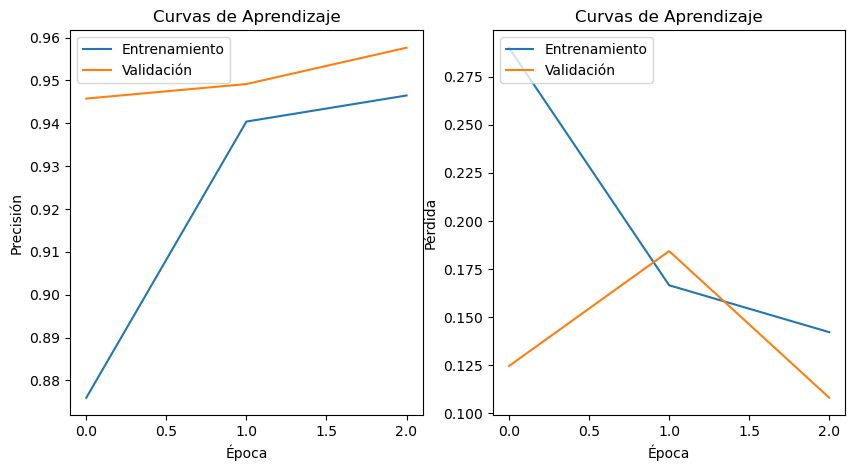

In [21]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# To visualize the accuracy of training and validation over time
axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_title('Curvas de Aprendizaje')
axs[0].set_ylabel('Precisión')
axs[0].set_xlabel('Época')
axs[0].legend(['Entrenamiento', 'Validación'], loc='upper left')


# Visualize the loss of training and validation over time
axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('Curvas de Aprendizaje')
axs[1].set_ylabel('Pérdida')
axs[1].set_xlabel('Época')
axs[1].legend(['Entrenamiento', 'Validación'], loc='upper left')
fig.show()

<font size=2>**SAVE MODEL**</font>

In [22]:
#Save the model once it's stored
model_PROP.save("pneumonia_recognizer.hSpy")


INFO:tensorflow:Assets written to: pneumonia_recognizer.hSpy\assets


INFO:tensorflow:Assets written to: pneumonia_recognizer.hSpy\assets


## Mod. InceptionV3

In [34]:
#Introduce Parameter for the Model.
parameters_form()

In [35]:
# Create Datasets
ds_list=images_list+new_images_list
ds_NORMAL, ds_PNEUMO=dataset_creator(ds_list)
ds_total=ds_NORMAL+ds_PNEUMO

100%|██████████████████████████████████████████████████████████████████████████████| 5950/5950 [01:33<00:00, 63.55it/s]


Proceso completo.


In [25]:
#Load Dataset
X,y=dataset_loader(ds_total)

<font size=3>**Convert Image to RGB (...,...,...,3)**</font>

In [36]:
X_rgb=convert_RGB(X)

<font size=3>**SUBSET OF TRAIN, TEST & VALIDATION**</font>

In [37]:
# Set of data
X_train, X_test, y_train, y_test = train_test_split(X_rgb, y, test_size=val_size, random_state= 42)
X_train, X_val, y_train, y_val =train_test_split(X_train,y_train, test_size=test_size,random_state= 42)

print(f'X (train/test/val):{len(X_train)},{len(X_test)},{len(X_val)} -- y (train/test/val):{len(y_train)},{len(y_test)},{len(y_val)}')

X (train/test/val):4765,595,590 -- y (train/test/val):4765,595,590


<font size=3>**MODEL V3**</font>

In [38]:
base_mod_V3 = tf.keras.applications.InceptionV3(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                                                include_top=False,
                                                weights='imagenet')

<font size=2>**Remove Weights, Average Layer and Output Layer**</font>

In [39]:
# Freeze weights of the base model
base_mod_V3.trainable = False

# Add global average layer
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

# Add prediction layer
prediction_layer = tf.keras.layers.Dense(1)

In [40]:
# Build final model
model_V3 = tf.keras.Sequential([
  base_mod_V3,
  global_average_layer,
  prediction_layer
])

# model_V3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
base_learning_rate = 0.0001
model_V3.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

<font size=2>**MODEL TRAINING**</font>

In [41]:
# Training the model
history_V3=model_V3.fit(X_train, y_train, epochs=EPOCHS, validation_data=(X_val, y_val),batch_size=BATCH_SIZE)

Epoch 1/10
149/149 [==============================] - 26s 142ms/step - loss: 0.5993 - accuracy: 0.6241 - val_loss: 0.4495 - val_accuracy: 0.7661
Epoch 2/10
149/149 [==============================] - 15s 99ms/step - loss: 0.4064 - accuracy: 0.7971 - val_loss: 0.3653 - val_accuracy: 0.8390
Epoch 3/10
149/149 [==============================] - 15s 99ms/step - loss: 0.3501 - accuracy: 0.8382 - val_loss: 0.3251 - val_accuracy: 0.8593
Epoch 4/10
149/149 [==============================] - 14s 97ms/step - loss: 0.3177 - accuracy: 0.8615 - val_loss: 0.3006 - val_accuracy: 0.8610
Epoch 5/10
149/149 [==============================] - 15s 97ms/step - loss: 0.2960 - accuracy: 0.8768 - val_loss: 0.2832 - val_accuracy: 0.8746
Epoch 6/10
149/149 [==============================] - 15s 98ms/step - loss: 0.2796 - accuracy: 0.8816 - val_loss: 0.2705 - val_accuracy: 0.8847
Epoch 7/10
149/149 [==============================] - 15s 104ms/step - loss: 0.2671 - accuracy: 0.8881 - val_loss: 0.2606 - val_accurac

<font size=2>**MODEL EVALUATION**</font>

In [42]:
accuracy_train = model_V3.history.history['accuracy'][-1]
loss0, accuracy_test = model_V3.evaluate(X_test, y_test)

print(f'ACC. TEST: {accuracy_test} -- ACC. TRAIN: {accuracy_train} ')

19/19 [==============================] - 2s 98ms/step - loss: 0.2528 - accuracy: 0.9042
ACC. TEST: 0.9042016863822937 -- ACC. TRAIN: 0.8996852040290833 


<font size=2>**LEARNING CURVES**</font>

C:\Users\User\AppData\Local\Temp\ipykernel_17876\3648086599.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


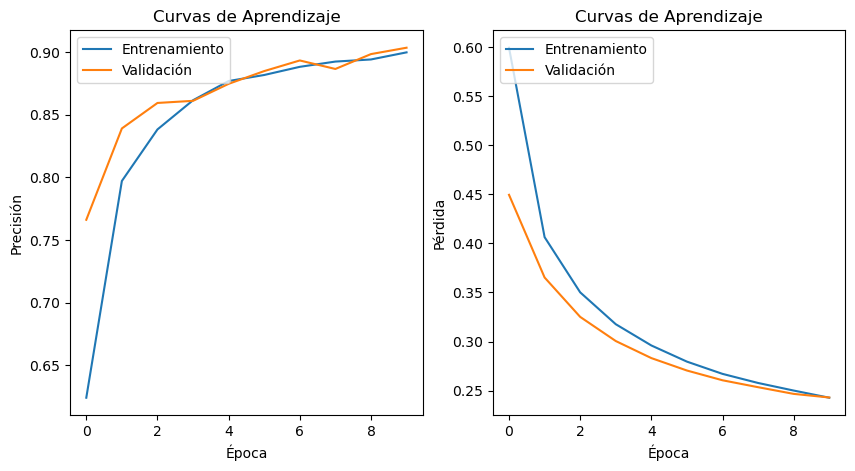

In [43]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Visualize the accuracy of training and validation over time
axs[0].plot(history_V3.history['accuracy'])
axs[0].plot(history_V3.history['val_accuracy'])
axs[0].set_title('Curvas de Aprendizaje')
axs[0].set_ylabel('Precisión')
axs[0].set_xlabel('Época')
axs[0].legend(['Entrenamiento', 'Validación'], loc='upper left')


# Visualize the accuracy of training and validation over time
axs[1].plot(history_V3.history['loss'])
axs[1].plot(history_V3.history['val_loss'])
axs[1].set_title('Curvas de Aprendizaje')
axs[1].set_ylabel('Pérdida')
axs[1].set_xlabel('Época')
axs[1].legend(['Entrenamiento', 'Validación'], loc='upper left')
fig.show()